In [733]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [734]:
df=pd.read_csv("salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [735]:
df.shape

(1000, 7)

In [736]:
df.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

In [737]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [738]:
df.columns


Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [739]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [740]:
df.duplicated().sum()

np.int64(0)

In [741]:
df.nunique()

Education        4
Experience      29
Location         3
Job_Title        4
Age             45
Gender           2
Salary        1000
dtype: int64

In [742]:
df["Job_Title"].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [743]:
df["Education"]=df["Education"].map({"High School":0,"PhD":3,"Bachelor":1,"Master":2})
df["Location"]=df["Location"].map({"Urban":3,"Suburban":2,"Rural":1})
df["Job_Title"]=df["Job_Title"].map({"Manager":4,"Director":3,"Analyst":2,"Engineer":1})
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,0,8,3,4,63,1,84620.053665
1,3,11,2,3,59,1,142591.255894
2,1,28,2,4,61,0,97800.255404
3,0,29,1,3,45,1,96834.671282
4,3,25,3,2,26,0,132157.786175


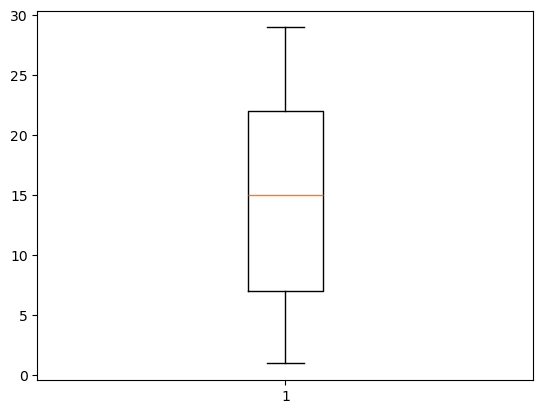

In [744]:
plt.boxplot(df["Experience"])
plt.show()

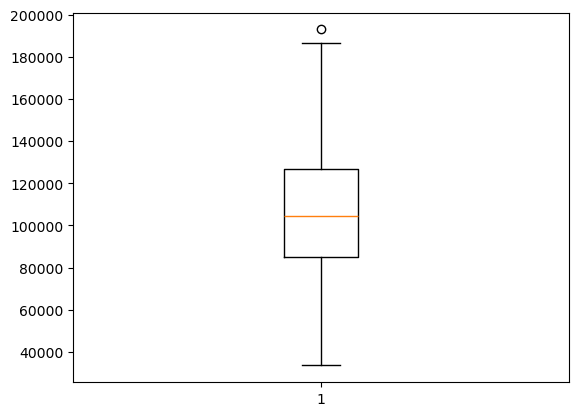

In [745]:
plt.boxplot(df["Salary"])
plt.show()

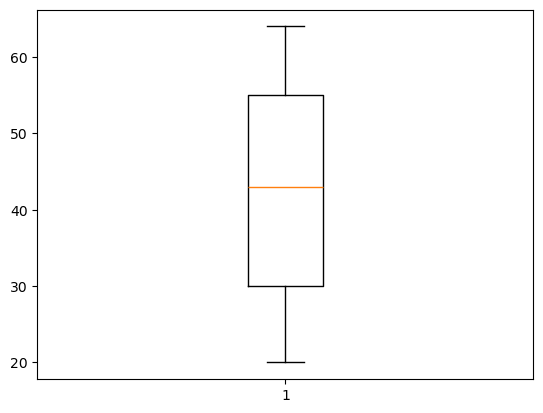

In [746]:
plt.boxplot(df["Age"])
plt.show()

0.10329922102138679


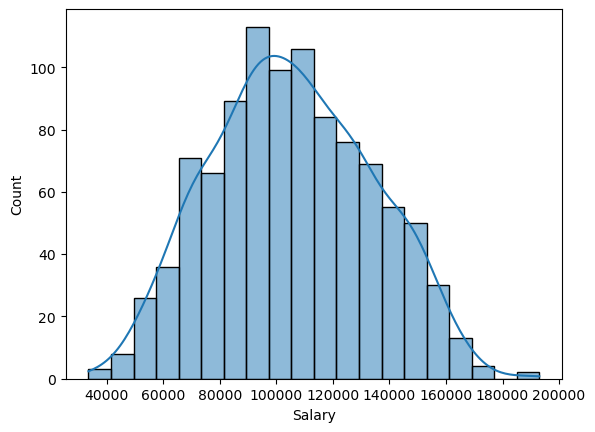

In [747]:
sns.histplot(df["Salary"],kde=True)
print(df["Salary"].skew())

<Axes: >

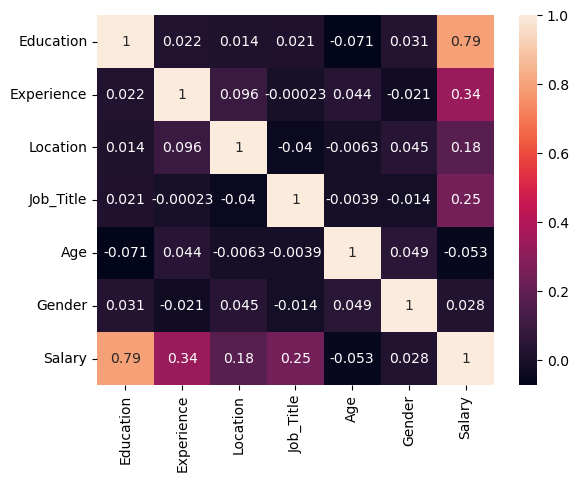

In [748]:
sns.heatmap(df.corr(),annot=True)

In [749]:
x=df.drop(columns=["Salary"]).values
y=df["Salary"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Squared Error: 164656659.2831294
Root Mean Squared Error: 12831.861099744237
r2_score: 0.7983450039972905


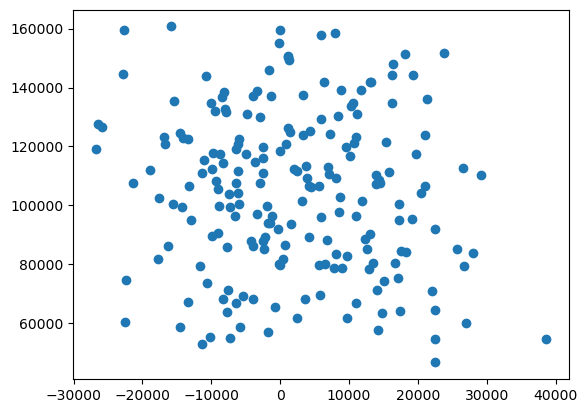

In [750]:
residual=y_test-y_pred
plt.scatter(residual,y_pred)
plt.show()

In [751]:
print((np.sqrt(mean_squared_error(y_test,y_pred))/y.mean())*100)

12.156171924234071


In [752]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

In [753]:
df.head(10)

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,0,8,3,4,63,1,84620.053665
1,3,11,2,3,59,1,142591.255894
2,1,28,2,4,61,0,97800.255404
3,0,29,1,3,45,1,96834.671282
4,3,25,3,2,26,0,132157.786175
5,3,19,1,3,27,0,156312.936208
6,3,4,1,3,60,0,130567.649455
7,3,13,2,3,49,0,148707.740759
8,1,20,3,1,25,0,95945.275429
9,3,14,3,2,58,0,133339.389682


In [754]:
x=np.array([[3,13,2,3,49,0]])
x=scaler.transform(x)
y_pred=model.predict(x)
print(y_pred[0])

136409.2621632992


In [755]:
import pickle
pickle.dump(model,open("model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))